In [5]:
import numpy as np
import scipy.stats as sstats
import RNG.Distributions as rngd
import matplotlib.pyplot as plt
import RNG.DiscreteSim as ds


Blocked C.I: [0.005059394111507221, 0.00526580588849278]	 Nr accepted in first run: 9952


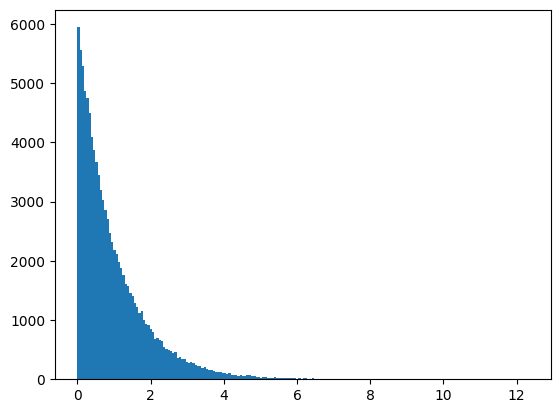

In [6]:
nrExperiments = 1000
subSamples = []
m = 10
lambda_S = 8 #Time between services
lambda_A = 1 #Time between arrivals
k_S = 2.00

S_t = rngd.Pareto(k_S,lambda_S/(k_S/(k_S-1)))
A_t = rngd.Exponential(lambda_A)

arrival_sample_for_plot = A_t.getSample(100000)
plt.hist(arrival_sample_for_plot,bins=200)
print("")

for _ in range(nrExperiments):


    servers = ds.BlockingServers(S_t,m)

    nrArrivals = 10*1000

    t = 0
    event_list = []
    for i in range(nrArrivals):
        t += A_t.getSample()[0]
        event_list += [t]

    blockingCounter = []

    for t_A in event_list:
        blockingCounter += [(t_A,servers.scheduleService(t_A))]

    subSamples += [blockingCounter]

proportions = ds.getSubProportions(subSamples)
CI = ds.getConfidenceInterval(proportions)

print(f"Blocked C.I: {CI}\t Nr accepted in first run: {ds.getNrBlocked(subSamples[0]).count(0)}")

In [ ]:
S_t_samples = S_t.getSample(100000)
plt.hist(S_t_samples,bins=200)

In [ ]:
S_t_samples.max()

(array([ 36., 232., 330., 244.,  97.,  43.,  12.,   2.,   0.,   4.]),
 array([0.0014 , 0.00271, 0.00402, 0.00533, 0.00664, 0.00795, 0.00926,
        0.01057, 0.01188, 0.01319, 0.0145 ]),
 <BarContainer object of 10 artists>)

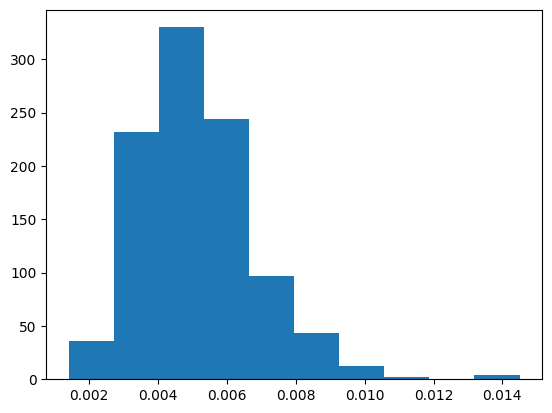

In [9]:
plt.hist(proportions)